In [233]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score as accuracy
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# import os
# os.environ["PATH"] += os.pathsep + "/home/matt/.pyenv/versions/3.7.7/lib/python3.7/site-packages/graphviz/"
# import sys
# str1 = "/home/matt/.pyenv/versions/3.7.7/lib/python3.7/site-packages/graphviz/"
# sys.path.append(str1)

# from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [234]:
df = pd.read_csv('/home/matt/Downloads/mushrooms.csv')

In [235]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [236]:
### Transformando as colunas categórica em números

In [237]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [238]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Os dados estão equilibrados?

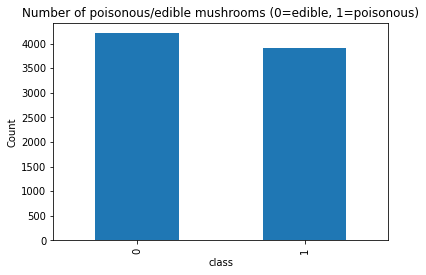

In [239]:
# sns.barplot(x=pd.Series(df['class'].value_counts().sort_index()), y=df['class'].count(), hue=)

plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

### Montando as features e label

In [240]:
features = df.drop(columns='class')
label = df['class']

### Montando base treino e teste

In [241]:
features_train, features_test, label_train, label_test = split(features, label, test_size=0.3)

### Fazendo o Modelo

In [242]:
clf = tree.DecisionTreeClassifier()

In [243]:
clf.fit(features_train, label_train)

DecisionTreeClassifier()

[Text(133.59807692307692, 203.85, 'X[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2954, 2732]'),
 Text(64.38461538461539, 176.67000000000002, 'X[20] <= 3.5\ngini = 0.272\nsamples = 2284\nvalue = [371, 1913]'),
 Text(25.753846153846155, 149.49, 'X[19] <= 1.5\ngini = 0.214\nsamples = 394\nvalue = [346, 48]'),
 Text(12.876923076923077, 122.31, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(38.63076923076923, 122.31, 'X[7] <= 0.5\ngini = 0.089\nsamples = 363\nvalue = [346, 17]'),
 Text(25.753846153846155, 95.13, 'gini = 0.0\nsamples = 346\nvalue = [346, 0]'),
 Text(51.50769230769231, 95.13, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(103.01538461538462, 149.49, 'X[10] <= 2.0\ngini = 0.026\nsamples = 1890\nvalue = [25, 1865]'),
 Text(90.13846153846154, 122.31, 'X[12] <= 0.5\ngini = 0.007\nsamples = 1872\nvalue = [7, 1865]'),
 Text(77.26153846153846, 95.13, 'X[21] <= 0.5\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(64.38461538461539, 67.94999999999999, 'gini = 0.0\

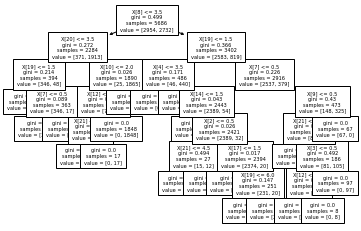

In [244]:
tree.plot_tree(clf, fontsize=5, precision=3)

In [245]:
predict = clf.predict(features_test)

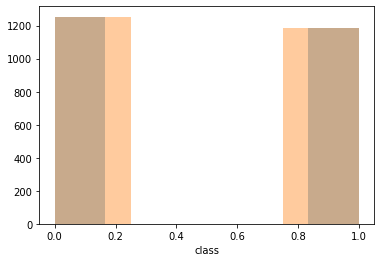

In [246]:
sns.distplot(label_test, bins=6, kde=False)
sns.distplot(predict, bins=4, kde=False)

In [247]:
print(f'Taxa de acerto do modelo: {round(accuracy(label_test, predict) * 100,2)}%')

Taxa de acerto do modelo: 100.0%


In [248]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=features.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH